NOTE: unsourced images are clickable links to sources.

In [24]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1920,
              'height': 1080,
              'scroll': False,
})

{'height': 1080, 'rise': {'theme': 'sky'}, 'scroll': False, 'width': 1920}

Cell below is from GitHub user mbewley's comment on [here](https://github.com/damianavila/RISE/issues/255).

In [2]:
%%HTML

<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

In [3]:
from IPython.display import Image, HTML, display, Audio

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import utils

/Users/charlesfrye/anaconda3/envs/tf-nightly/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [17]:
scale = 1

losses = {"quadratic": lambda x,y: np.square(x)+np.square(y),
        "local_minima": lambda x,y: -np.cos(3*x)+0.15*(np.square(x)+np.square(y)+2.5*np.abs(x)),
        "gaussian_field": lambda x,y: utils.gauss_random_field(x,y,scale) }

# Understanding Neural Network Optimization

<br>
<br>
<br>
<br>
<br>
<br>

### Charles Frye
#### Joint work with Neha Wadia

## Artificial Neural Networks are the most practically useful model of neural computation.


They can ...

### beat world-class human players at Go,
<br><br><br>
<center>
[![](https://i.ytimg.com/vi/XZotQte2HbY/hqdefault.jpg)](https://www.youtube.com/watch?v=XZotQte2HbY)
</center>

### produce realistic speech and music,
<br><br>

In [10]:
Audio(filename='res/wavenet_speech_example.wav')

In [11]:
Audio(filename='res/wavenet_music_example.wav')

### automatically caption images,
<br><br>
<center>
[![sumo wrestlers](res/sumo wrestlers.jpeg)](https://medium.com/@samim/generating-stories-about-images-d163ba41e4ed)
https://github.com/ryankiros/neural-storyteller

### and learn complex motor behaviors.

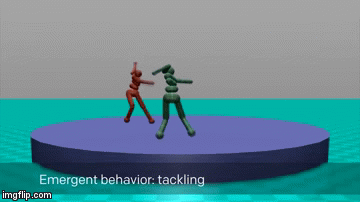

In [12]:
Image(filename="res/sumo_wrestling.gif")
# http://blogs.discovermagazine.com/d-brief/2017/10/13/artificial-intelligence-wrestle

## Artificial Neural Networks are extremely simple.
<br><br>
<center> ![fullmatrix](res/fullmatrix.png) </center>

<!-- $$
\text{activity of neuron}_k \ \text{in layer}_j = \sigma\left(\text{synaptic weights}_{k}^\top \text{activity vector of layer}_{j-1}\right) \\
\text{activity of neuron}_{k+1} \ \text{in layer}_j = \sigma\left(\text{synaptic weights}_{k+1}^\top \text{activity vector of layer}_{j-1}\right) \\
\text{activity of neuron}_{k+2} \ \text{in layer}_j = \sigma\left(\text{synaptic weights}_{k+1}^\top \text{activity vector of layer}_{j-1}\right)
$$ -->

$$
\color{#FF7E00}{\text{out}} = \sigma\left(W\cdot\color{#5D8AA8}{\text{in}}\right)
$$

$$
\sigma: \ \ \ \text{(spike rate) nonlinearity} \\
W: \ \ \ \text{(synaptic) weight matrix}
$$

Loss Function:

$$
L(\color{#FF7E00}{\text{out}}, \text{target})
$$

Gradient Update:

$$
W\ \mathrel{+}=\ - \eta \color{#4ed898}{\nabla_WL}
$$

where:

$$
L(W+\epsilon) \approx L(W) + \color{#4ed898}{\nabla_WL}^\top\epsilon
$$

## They provide a tractable model for studying behavior and perception.
<br><br><br>
We might learn a thing or two that will help us understand neural computation in biological systems.

## Neural networks emerged from theoretical neuroscience, not computer science.

<center><img src=res/mcc_pitts.png width=1024></center>
<br><br>
<small> Bull. Math. Biophysics, 1943.

```
WASHINGTON, July 7 (UPI) -- 
The Navy revealed the embryo of
an electronic computer
today that it expects will be able
to walk, talk, see, write, reproduce itself
and be conscious of its existence.
```
<small> *New York Times*, July 8th, 1958.

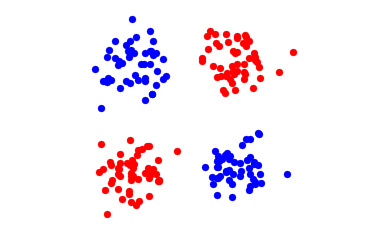

In [13]:
reds = np.vstack([np.random.normal([3,3], size=(50,2)),
                  np.random.normal([-3,-3], size=(50,2))])
blues = np.vstack([np.random.normal([3,-3], size=(50,2)),
                   np.random.normal([-3,3], size=(50,2))])
plt.scatter(*reds.T, color="red"); plt.scatter(*blues.T, color="blue");
plt.axis("equal"); plt.axis("off");

<center>
<img src=res/perceptrons.png width=600>
</center>
<br> <br>
<small> Marvin Minsky and Seymour Papert, 1969, *Perceptrons*

<center><img src="res/backprop.png", width=450></center>
<br><br>
<small> Rumelhardt, Hinton, and Williams, 1986. *Learning Representations by Back-Propagating Errors*. **Nature**.

<center>
![neocognitron](res/neocognitron.png)
</center>

<small> 1980, **Biological Cybernetics**.

<center>
![imagenet architecture](res/imagenet_architecture.png)
</center>
<br>
<br>
<br>
<small> Krishevsky, Sutskever, and Hinton, 2014. *ImageNet Classification with Deep Convolutional
Neural Networks*. **NIPS Proc**.

## For decades, they were ignored by mainstream computer science.
<br>
<br>
Many were convinced that neural networks were impossible to train.
Toy examples were finicky and sensitive to initial parameter choices.
The suspicion was that this would only get worse for larger problems.

## It's easy to see how they might fail.

### Neural networks are trained by "going downhill",

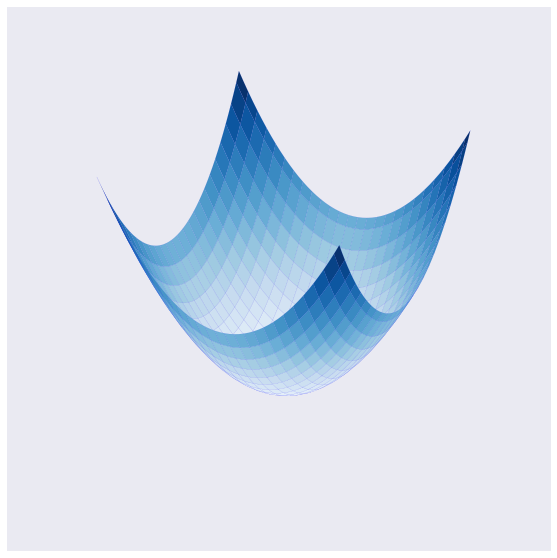

In [14]:
loss = losses["quadratic"]; N = 50; mesh_extent = 1
utils.plot_loss_surface(loss, N, mesh_extent)

### and sometimes going downhill doesn't get you to the bottom.

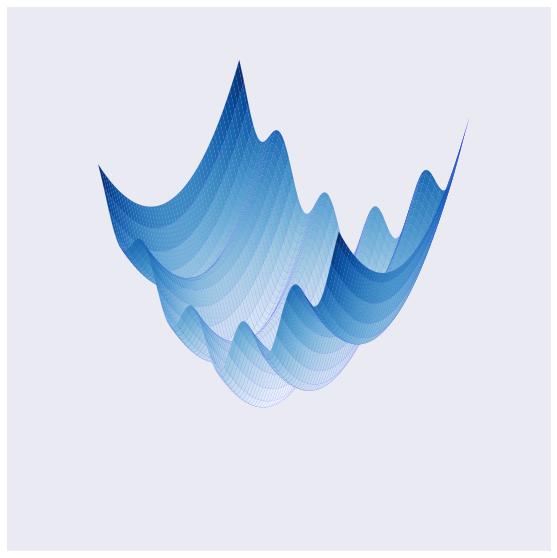

In [15]:
loss = losses["local_minima"]; N = 100; mesh_extent = 5
utils.plot_loss_surface(loss, N, mesh_extent)

## But that intuition doesn't carry over into larger problems.

Neural networks work better on larger problems.

Why might this be?


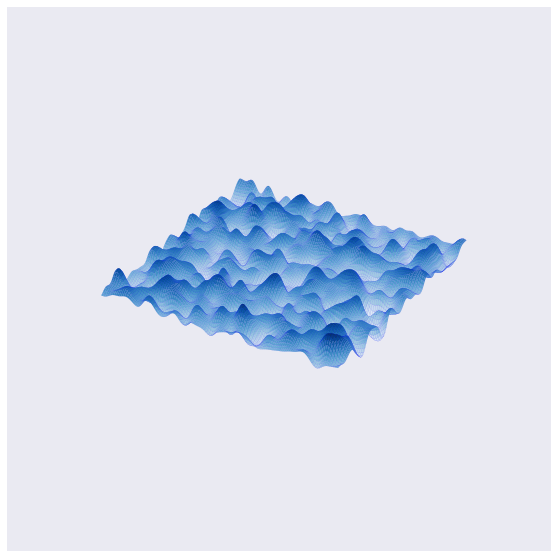

In [18]:
loss = losses["gaussian_field"]; N = 250; mesh_extent = 25
utils.plot_loss_surface(loss, N, mesh_extent)

## To understand why, we need to understand *curvature*.

$$
L(W+\epsilon) \approx L(W) \ + \  \color{#4ed898}{\nabla_W L}^\top \epsilon
$$

<span style="color:#4ed898"> Best Linear Approximation

$$
L(W+\epsilon) \approx L(W) \ + \  \color{#4ed898}{\nabla_W L^\top} \epsilon \ 
+ \epsilon^\top\color{#a73eb7}{\nabla_W^2 L}\epsilon \ + \ ...
$$

<span style="color:#4ed898"> Best Linear Approximation
    
<span style="color:#a73eb7"> Best Quadratic ("Squared") Approximation

We call <span style="color:#a73eb7"> $\nabla_W^2 L$ </span> the *Hessian matrix*.

## Eigenvalues of Hessian matrices encode curvature.

$$
\lambda_1 > \lambda_2 > 0 \text{ : bowl}
$$

<center>
<img src=res/guac_bowl.jpg width=400>

$$
\lambda_1 > 0 > \lambda_2 \text{ : saddle}
$$

<center>
<img src=res/pringle_saddle.jpg width=400>

$$
\lambda_1 > 0 = \lambda_2 \text{ : degenerate saddle}
$$

<center>
<img src=res/taco_degenerate_saddle.jpg width=400>

## In theory, neural networks' Hessians might behave like random matrices.

Surprisingly, the eigenvalues of random matrices are very stereotyped.

### Wigner matrices have semicircular eigenvalue distributions,

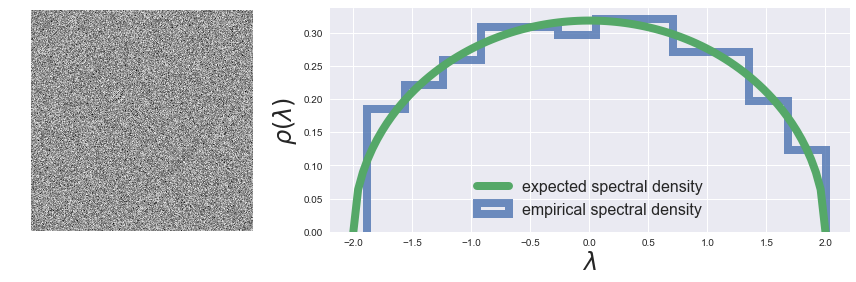

In [19]:
wigner_random_matrix = utils.generate_symmetric(250)
utils.plot_matrix_and_spectrum(wigner_random_matrix, utils.plot_wigner_comparison)

Semicircular distributions arise by randomly (but symmetrically) filling the entries of the matrix.

### Wishart matrices have spike-and-slab eigenvalue distributions,

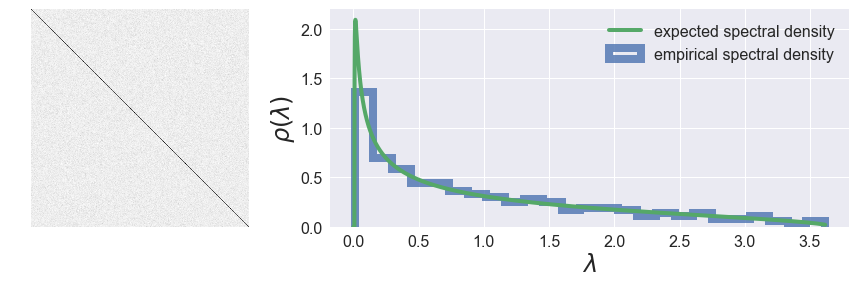

In [20]:
wishart_random_matrix = utils.generate_wishart(250, k=300)
utils.plot_matrix_and_spectrum(wishart_random_matrix, utils.plot_marchenko_comparison, {"N":250, "k":300})

Wishart matrices are like random covariance matrices.

### and a simple model of NN Hessians is a mixture of Wigner and Wishart matrices.

<center>
    <img src="res/pennington_bahri_spectrum.png" width=400>
</center>

When the loss is high, the Wigner component dominates.

When the loss is low, the Wishart component dominates.

<small> Pennington and Bahri, 2017. **Geometry of Neural Network Loss Surfaces via Random Matrix Theory**. **ICLR Proc**.

## But we don't know that much about neural network Hessians.

Empirical work is limited, since the focus of most papers is on the theory.

## I'd like to see if past findings generalize to new datasets.

There are datasets on which neural networks perform poorly. Does performance correlate with how well this model approximates the loss surface?

## So far, I have only replicated past results.

It has been shown that the curvature of the loss surface of a network learning to compress hand-written digit images matches the mixed random matrix model.

In [21]:
curvature_tracking = np.load("res/curvature_tracking/tracking/train.npz")

In [22]:
optimizer_cost_train = curvature_tracking["cost"]
indices = curvature_tracking["indices"]
spectrums = curvature_tracking["cost_eigenvalues"]

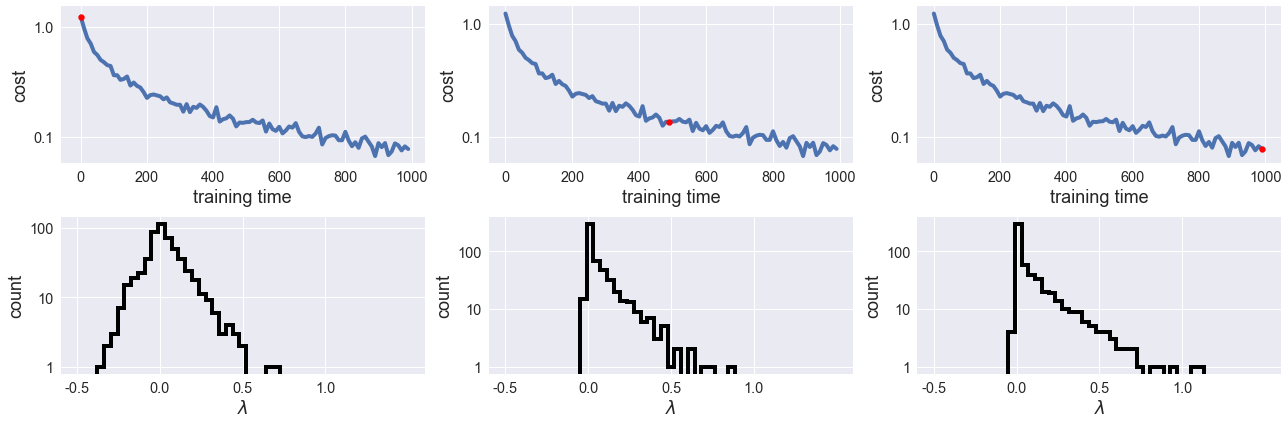

In [23]:
utils.plot_curvature_training(indices, optimizer_cost_train, spectrums)

## Next up: The UCI ML Repository

Over 400 datasets across many fields, on many of which neural networks are not state-of-the art.

Do findings from

## Acknowledgements

- Neha Wadia; collaborator
- Mike DeWeese and Kris Bouchard; co-advisors
- Ryan Zarcone, Brian Cheung, Alex Anderson, Jesse Livezey, and Dylan Paiton; useful discussions

<br><br><br>
<small> <small> Check out the presentation on GitHub: [charlesfrye/neurotroph_presentation_20180423](https://github.com/charlesfrye/neurotroph_presentation_20180423)